In [1]:

import os
import imp
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import sys
import pickle
import importlib.util
import sympy as sp
sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
import lumapi
sys.path.append(os.path.dirname('/home/moises/Downloads/'))
#os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\')
#lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py') 

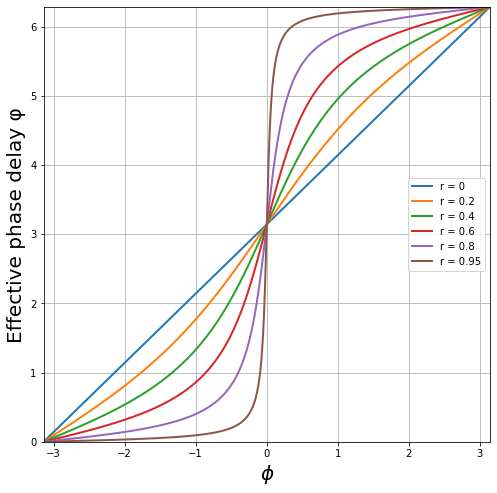

In [2]:

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
figure1 = plt.figure(figsize=(8, 8))

a=1 #zero attenuation
phi = np.linspace(-np.pi,np.pi, 1000)
r = [0, 0.2, 0.4, 0.6, 0.8, 0.95]

for i in range(0,len(r)):

    phi_eff = np.pi + phi + np.arctan(r[i]*np.sin(phi)/(a-r[i]*np.cos(phi))) + np.arctan(r[i]*a*np.sin(phi)/(1-r[i]*a*np.cos(phi)))
    plt.plot(phi,phi_eff, label='r = '+str(r[i]), linewidth=2)
    plt.grid(True)
    plt.xlim([-np.pi,np.pi])
    plt.ylim([0, 2*np.pi])
    plt.ylabel('Effective phase delay '+ 'φ', size = '20')
    plt.xlabel('$\phi$', size = 20)
    plt.legend(loc='center right')

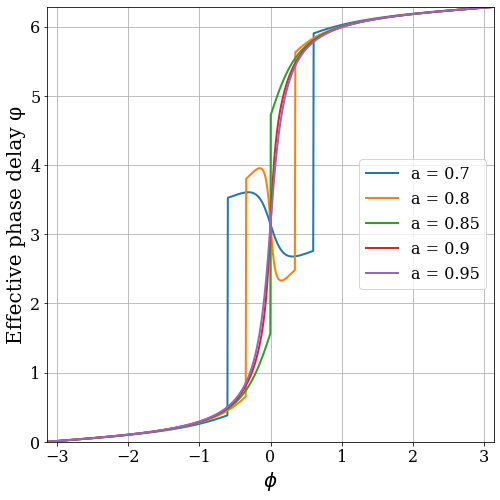

In [3]:
figure2 = plt.figure(figsize=(8, 8))
plt.rc('font', **font)
r = 0.85
a = [ 0.7, 0.8, 0.85, 0.9, 0.95]
phi = np.linspace(-np.pi,np.pi, 1000)

for i in range(0, len(a)):
    phi_eff = np.pi + phi + np.arctan(r*np.sin(phi)/(a[i]-r*np.cos(phi))) + np.arctan(r*a[i]*np.sin(phi)/(1-r*a[i]*np.cos(phi)))
    plt.plot(phi,phi_eff, label='a = '+str(a[i]), linewidth=2)
    plt.grid(True)
    plt.xlim([-np.pi,np.pi])
    plt.ylim([0, 2*np.pi])
    plt.ylabel('Effective phase delay '+ 'φ', size = '20')
    plt.xlabel('$\phi$', size = 20)
    plt.legend(loc='center right')

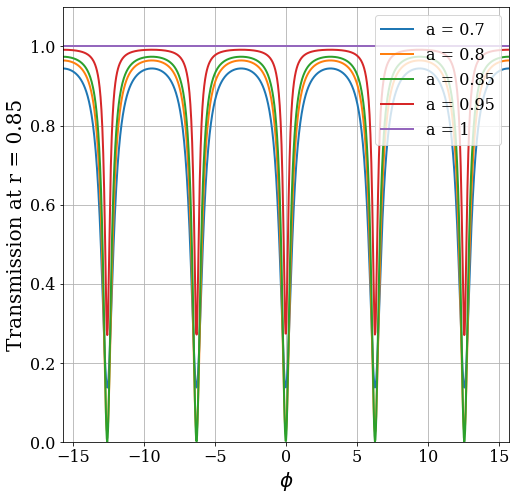

In [4]:
figure3 = plt.figure(figsize=(8, 8))
r = 0.85
a = [ 0.7,0.8,0.85, 0.95, 1]
phi = np.linspace(-5*np.pi,5*np.pi, 1000)
for i in range(0, len(a)):
    T = (a[i]**2 - 2*r*a[i]*np.cos(phi) + (r)**2)/(1 - 2*a[i]*r*np.cos(phi) + (r*a[i])**2)
    plt.plot(phi, T, label= 'a = ' + str(a[i]), linewidth = 2)
    plt.grid(True)
    plt.xlim([-5*np.pi,5*np.pi])
    plt.ylim([0, 1.1])
    plt.ylabel('Transmission at r = 0.85', size = '20')
    plt.xlabel('$\phi$', size = 20)
    plt.legend(loc='upper right')

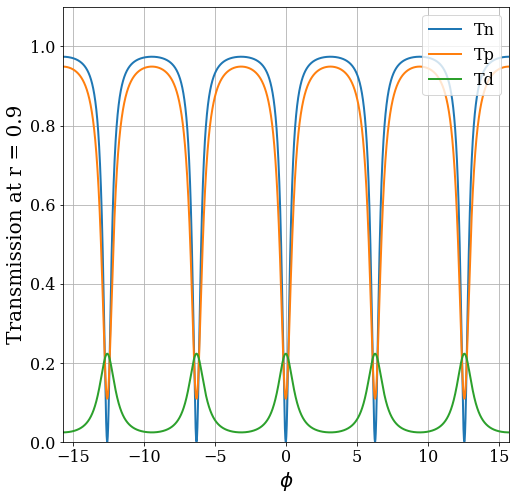

In [5]:
figure3 = plt.figure(figsize=(8, 8))
r1= 0.9
r2 = 0.9
r = 0.85

a = 0.85
phi = np.linspace(-5*np.pi,5*np.pi, 10000)

T_n = (a**2 - 2*r*a*np.cos(phi) + (r)**2)/(1 - 2*a*r*np.cos(phi) + (r*a)**2)
T_p = ((r*a)**2 - 2*r**2*a*np.cos(phi) + r**2)/(1 - 2*r**2*a*np.cos(phi)+(r**2*a)**2)
T_d = (1-r**2)*(1-r**2)*a/(1 - 2*r**2*a*np.cos(phi)+(r*a)**2)
plt.plot(phi, T_n, label= 'Tn', linewidth = 2)
plt.plot(phi, T_p, label= 'Tp', linewidth = 2)
plt.plot(phi, T_d, label= 'Td', linewidth = 2)
plt.grid(True)
plt.xlim([-5*np.pi,5*np.pi])
plt.ylim([0, 1.1])
plt.ylabel('Transmission at r = 0.9', size = '20')
plt.xlabel('$\phi$', size = 20)
plt.legend(loc='upper right')

In [34]:
c = 299792458
lambd = 1550e-9 
ng = 4.622
FSR = 25.6e-9
FWHM = lambd**2*(100e9)/c
L = lambd**2/(ng*FSR)
Q = lambd/FWHM
radius = L/(2*np.pi)
delta_n = 1.98577 - 1.876785
T11 = np.sqrt(((ng*L*np.pi)/(2*Q*lambd))**2 + 1) - (ng*L*np.pi)/(2*Q*lambd)
T12 = np.sqrt(1-T11**2)
Lc = lambd/(np.pi*delta_n)*np.arcsin(T12)
print(radius)
print(Lc)
print(L)
print(Q)
print(FWHM)

3.2315704002112736e-06
1.407798473103697e-06
2.030455565772393e-05
1934.1448903225807
8.013877387135603e-10


18.84955592153876

In [7]:
b = (FWHM*np.pi*ng*L)**2/(lambd**4)
result_ = np.roots([1,-(2+b),1])
coeff = np.sqrt(result_)
solution = 1 - result_
print(solution)
print(coeff)
10*np.log10(solution[1])

[-0.10329977  0.09362802]
[1.05038078 0.9520357 ]


-10.285941635210087

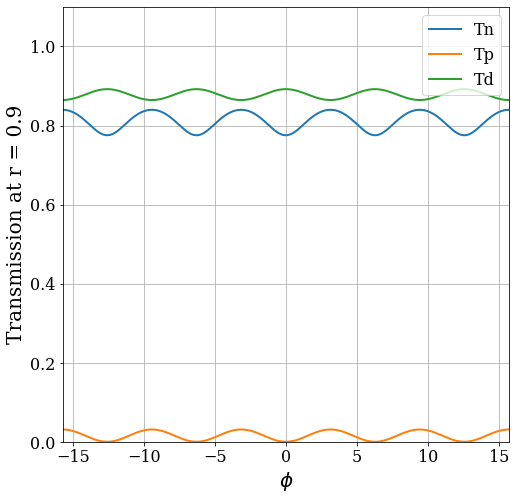

In [8]:
figure4 = plt.figure(figsize=(8, 8))
r1= 0.9
r2 = 0.9
r = solution[1]

a = 0.9
phi = np.linspace(-5*np.pi,5*np.pi, 10000)

T_n = (a**2 - 2*r*a*np.cos(phi) + (r)**2)/(1 - 2*a*r*np.cos(phi) + (r*a)**2)
T_p = ((r*a)**2 - 2*r**2*a*np.cos(phi) + r**2)/(1 - 2*r**2*a*np.cos(phi)+(r**2*a)**2)
T_d = (1-r**2)*(1-r**2)*a/(1 - 2*r**2*a*np.cos(phi)+(r*a)**2)
plt.plot(phi, T_n, label= 'Tn', linewidth = 2)
plt.plot(phi, T_p, label= 'Tp', linewidth = 2)
plt.plot(phi, T_d, label= 'Td', linewidth = 2)
plt.grid(True)
plt.xlim([-5*np.pi,5*np.pi])
plt.ylim([0, 1.1])
plt.ylabel('Transmission at r = 0.9', size = '20')
plt.xlabel('$\phi$', size = 20)
plt.legend(loc='upper right')

In [9]:
fdtd =lumapi.FDTD(filename= 'halfring.fsp')

In [3]:
def RectInsert(X,XSPAN,Y,YSPAN,Z,ZSPAN,MATERIAL,lumerical):
    
    lumerical.switchtolayout()
    lumerical.addrect()
    lumerical.set("x",X)
    lumerical.set("x span",XSPAN)
    lumerical.set("y",Y)
    lumerical.set("y span",YSPAN)
    lumerical.set("z",Z)
    lumerical.set("z span", ZSPAN)
    lumerical.set("material",MATERIAL)



In [5]:
fdtd.switchtolayout()
fdtd.selectall()
fdtd.delete()

RectInsert(0, 15e-6, 0, 0.4e-6,0, 0.18e-6, "Si (Silicon) - Palik Copy 1", fdtd)
fdtd.set("name","rect_up")
RectInsert(0, 5e-6, -0.5e-6, 0.4e-6,0, 0.18e-6, "Si (Silicon) - Palik Copy 1", fdtd)
fdtd.set('name','rect_down')

fdtd.addring()
fdtd.set("name","ring_left")
fdtd.set({"x":-2.5e-6,
"y":-3e-6,
"z":0,
"z span":0.18e-6,
"outer radius":2.7e-6,
"inner radius":2.3e-6,
"theta start":90,
"theta stop":180,0.0799068
"y":-3e-6,
"z":0,
"z span":0.18e-6,
"outer radius":2.7e-6,
"inner radius":2.3e-6,
"theta start":0,
"theta stop":90,
"material":"Si (Silicon) - Palik Copy 1"
})

fdtd.addrect()
fdtd.set("name",'rect_left')
fdtd.set({"x":-5e-6,
"x span":0.4e-6,
"y max":-3e-6,
"y min":-4e-6,
"z":0,
"z span":0.18e-6,
"material":"Si (Silicon) - Palik Copy 1"})

fdtd.addrect()
fdtd.set("name",'rect_right')
fdtd.set({"x":5e-6,
"x span":0.4e-6,
"y max":-3e-6,
"y min":-4e-6,
"z":0,
"z span":0.18e-6,
"material":"Si (Silicon) - Palik Copy 1"})

fdtd.addfdtd()
fdtd.set({"z min bc":"Symmetric"})
fdtd.set({"background material":"SiO2 (Glass) - Palik Copy 1",
"x":0,
"x span": 16e-6,
"y min":-3.5e-6,
"y max": 2e-6,
"z":0,
"z span":2e-6})

fdtd.addport()
fdtd.set({"x":-7e-6,
"y":0,
"y span":3e-6,
"z":0,
"z span":2e-6})

fdtd.addport()
fdtd.set({"direction":"Backward",
"x":7e-6,
"y":0,
"y span":3e-6,
"z":0,
"z span":2e-6})
r1 = np.sqrt(0.823842)
fdtd.select("FDTD::ports")
fdtd.set({"monitor frequency points":25})
fdtd.setglobalsource("wavelength start",1.5e-6)
fdtd.setglobalsource("wavelength stop", 1.6e-6)



1.0

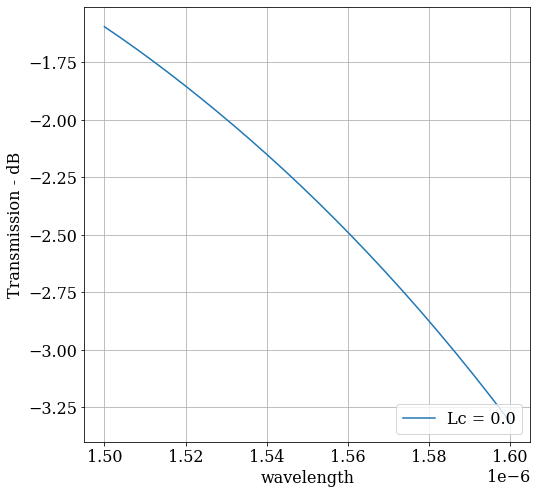

In [31]:
L_batimento = np.linspace(0e-6, 0.05e-6, 1)
Transmission = np.zeros((10,25))

for i in range(0, 1):
    fdtd.switchtolayout()
    fdtd.select("rect_down")
    fdtd.set("x span",L_batimento[i])
    fdtd.select("ring_left")
    fdtd.set("x", -L_batimento[i]/2)
    fdtd.select("ring_right")
    fdtd.set("x", L_batimento[i]/2)
    fdtd.select("rect_left")
    fdtd.set("x",(-L_batimento[i]/2)-2.0
    fdtd.select("FDTD::ports::port 1")
    fdtd.set("x", (-L_batimento[i]/2) - 3.5e-6)
    fdtd.select("FDTD::ports::port 2")
    fdtd.set("x", (L_batimento[i]/2) + 3.5e-6)

    fdtd.select("FDTD::ports::port 3")
    fdtd.set("x", (-L_batimento[i]/2)-2.5e-6)
02.5e-6)

    fdtd.select("FDTD")
    fdtd.set("x span", L_batimento[i] + 9e-6)

    fdtd.run()
    result = fdtd.getresult("FDTD::ports::port 2", "T")
    wavelength = result['lambda']
    a = abs(result['T'])**2
    for j in range(0, 25):
        Transmission[i, j] = a[j]  
print(Transmission)
print(result)
figure4 = plt.figure(figsize=(8, 8))
for k in range(0, 1):
    plt.plot(wavelength, 10*np.log10(Transmission[k,:]), label ="Lc = " + str(L_batimento[k]))
    plt.xlabel("wavelength")
    plt.ylabel("Transmission - dB")
    plt.grid(True)
    plt.legend(loc = "lower right")

In [33]:
10*np.log10(0.093)

-10.31517051446065

In [21]:
10*np.log10(1 - 0.09362802)
10*np.log10(0.768**2)


-2.29277559936976

In [27]:


fdtd.switchtolayout()
fdtd.setnamed("rect_down","x span",1.5e-6)
fdtd.setnamed("ring_left","x",-1.5e-6/2)
fdtd.setnamed("ring_right","x",1.5e-6/2)
fdtd.setnamed("rect_left","x",(-1.5e-6/2)-2.5e-6)
fdtd.setnamed("rect_right","x",1.5e-6/2+2.5e-6)

radius_ring = 2.5e-6
L_eff = 1.5e-6
height_rect = (L - (2*np.pi*radius_ring + 2*L_eff))/2

fdtd.setnamed("rect_left","y",-3e-6-(height_rect/2))
fdtd.setnamed("rect_left","y span",height_rect)
fdtd.setnamed("rect_right","y",-3e-6-(height_rect/2))
fdtd.setnamed("rect_right","y span",height_rect)

fdtd.addring()
fdtd.set({"name":"ring_left_down",
"x":-L_eff/2,
"y":-3e-6-height_rect,
"z":0,
"z span":0.18e-6,
"outer radius":2.7e-6,
"inner radius":2.3e-6,
"theta start":180,
"theta stop":270,
"material":"Si (Silicon) - Palik Copy 1"})

fdtd.addring()
fdtd.set({"name":"ring_righ_down",
"x":L_eff/2,
"y":-3e-6-height_rect,
"z":0,np.pi*radius_ring + height_rect
"z span":0.18e-6,
"outer radius":2.7e-6,
"inner radius":2.3e-6,
"theta start":270,
"theta stop":0,
"material":"Si (Silicon) - Palik Copy 1"})


RectInsert(0, 1.5e-6, -3e-6-height_rect-2.5e-6, 0.4e-6,0, 0.18e-6, "Si (Silicon) - Palik Copy 1", fdtd)
fdtd.set("name","rect_bottom")

RectInsert(0, 15e-6, -3e-6-height_rect-3e-6, 0.4e-6,0, 0.18e-6, "Si (Silicon) - Palik Copy 1", fdtd)
fdtd.set("name","rect_bottom_dropp")

fdtd.select("FDTD::ports::port 1")
fdtd.set("x", (-1.5e-6/2) - 3.5e-6)
fdtd.select("FDTD::ports::port 2")
fdtd.set("x", (1.5e-6/2) + 3.5e-6)

fdtd.select("FDTD")
fdtd.set("x span", 1.5e-6 + 9e-6)
fdtd.set("y min",-9e-6)
fdtd.set("y max",2e-6)

fdtd.addport()
fdtd.set({"direction":"Backward",
"x":-L_eff/2-3.5e-6,
"y":-3e-6-height_rect-3e-6,
"y span":3e-6,
"z":0,
"z span":2e-6})

fdtd.addport()
fdtd.set({"direction":"Backward",
"x":L_eff/2 + 3.5e-6,
"y":-3e-6-height_rect-3e-6,
"y span":3e-6,
"z":0,
"z span":2e-6})



/tmp/ipykernel_3555/3254082246.py:4: RuntimeWarning: divide by zero encountered in true_divide
  fun = (np.pi*ng*L*r*np.sqrt(a))/(lambd*(1-r**2*a))


(0.0, 1.0)

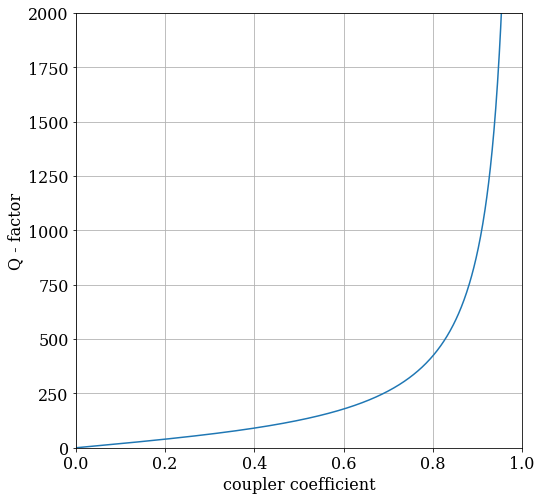

In [58]:
figure5 = plt.figure(figsize=(8,8))
r = np.linspace(0,1,1000)
a = 1
fun = (np.pi*ng*L*r*np.sqrt(a))/(lambd*(1-r**2*a))
plt.plot(r,fun)
plt.grid(True)
plt.ylabel("Q - factor")
plt.xlabel("coupler coefficient")
plt.ylim([0,2000])
plt.xlim([0,1])


In [52]:
np.sqrt(0.95)

0.9746794344808963